# 🚜 Predicting the Sale Price of Bulldozers using Machine Learning
In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

* `Problem to define` :- Predict the Future price of bulldozer


In [1]:
# Importing important tools 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline
plt.style.use('default')

In [2]:
# Import training and validation sets
df = pd.read_csv(
    "data\TrainAndValid.csv", low_memory=False)
df    


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [3]:
# getting the basic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [5]:
# Checking the missing values in the dataset
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

### Visualization of Data

<AxesSubplot:xlabel='saledate', ylabel='SalePrice'>

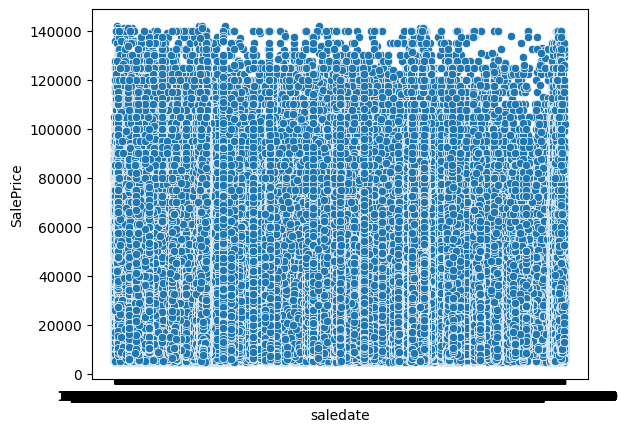

In [6]:
# Plotting the saledate and saleprice to understand the market at that time
sns.scatterplot(x = "saledate"[:100] , y = "SalePrice"[:100] , data = df)

# scatter plot is just not showing good visualization so try different 

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

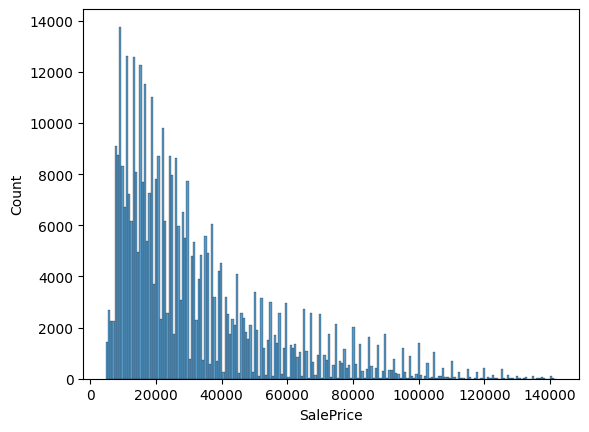

In [7]:
# Plotting Histogram to Unserstand the Data
sns.histplot(data= df , x = "SalePrice" , cbar= True )

### Correlational Matrix 

In [8]:
df.corr()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
SalesID,1.000000,0.023119,0.310149,0.147883,0.768909,-0.003298,0.005316,0.007377
SalePrice,0.023119,1.000000,-0.216841,-0.038063,0.021708,-0.048350,0.154389,0.015660
MachineID,0.310149,-0.216841,1.000000,0.165140,0.375914,0.005946,-0.052118,-0.001149
ModelID,0.147883,-0.038063,0.165140,1.000000,0.097704,-0.017852,-0.045511,-0.006736
datasource,0.768909,0.021708,0.375914,0.097704,1.000000,-0.019021,0.070933,0.009747
auctioneerID,-0.003298,-0.048350,0.005946,-0.017852,-0.019021,1.000000,-0.019037,0.030911
YearMade,0.005316,0.154389,-0.052118,-0.045511,0.070933,-0.019037,1.000000,-0.011598
MachineHoursCurrentMeter,0.007377,0.015660,-0.001149,-0.006736,0.009747,0.030911,-0.011598,1.000000


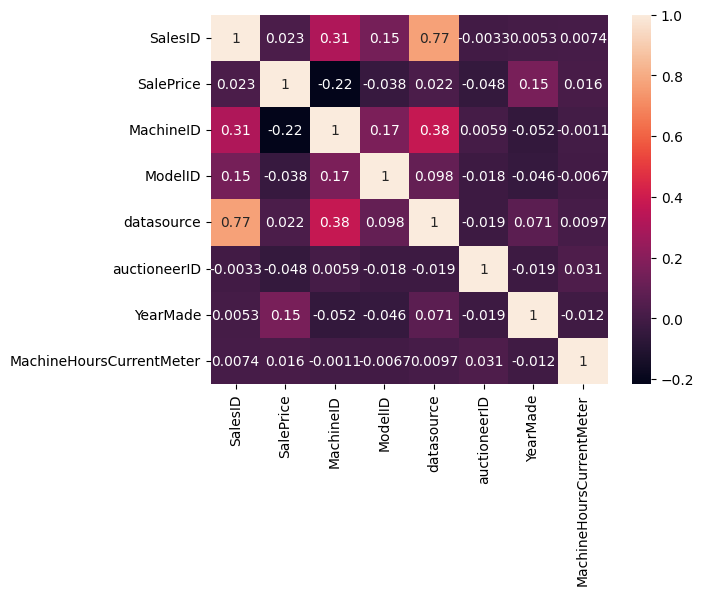

In [9]:
# Visualizing the Correlational matrix
corr_matrix = df.corr()

viz_matrix = sns.heatmap(corr_matrix  ,annot=True )

### Parsing Dates

In [10]:
# Import Data for Parsing dates
df = pd.read_csv(
    "data/TrainAndValid.csv" , low_memory=False , parse_dates= ["saledate"])


In [11]:
# Now pandas have converted the saledate column into year - month - day format 
df.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

<AxesSubplot:xlabel='saledate', ylabel='SalePrice'>

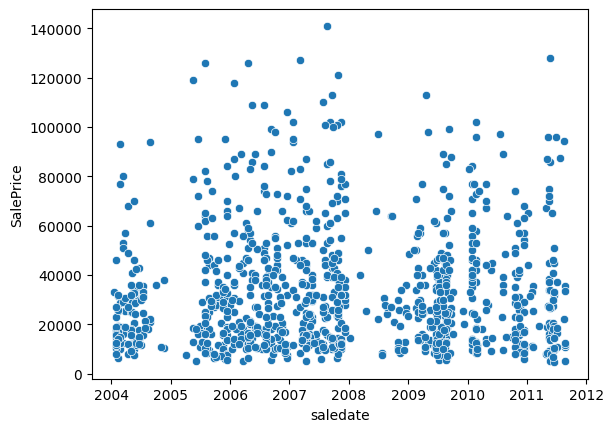

In [12]:
sns.scatterplot(x = df["saledate"][:1000], y = df["SalePrice"][:1000])

### Sort DataFrame by Saledate

In [13]:
# Here we will sort our data based on dates means from older to last sell by the date
df.sort_values(by=["saledate"], inplace= True , ascending= True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [14]:
# now full dataset have been changed 
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


#### Make a Copy of Original

In [15]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()

### Add Datetime Parameters in dataset :- `saledate`

In [16]:
# Adding Extra Columns for Enriching of our Dataset
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.day_of_week
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.day_of_year
df_tmp["saleOnMonthStart"] = df_tmp.saledate.dt.is_month_start
df_tmp["saleOnMonthEnd"] = df_tmp.saledate.dt.is_month_end
df_tmp["saleOnYearStart"] = df_tmp.saledate.dt.is_year_start
df_tmp["saleOnYearEnd"] = df_tmp.saledate.dt.is_year_end

In [17]:
# Dropping the Traditional Datetime Column 
df_tmp.drop("saledate", axis= 1 , inplace= True)

In [18]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,saleOnMonthStart,saleOnMonthEnd,saleOnYearStart,saleOnYearEnd
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,NaN,1989,1,17,1,17,False,False,False,False
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,Conventional,1989,1,31,1,31,False,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,NaN,1989,1,31,1,31,False,True,False,False
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,Conventional,1989,1,31,1,31,False,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,NaN,1989,1,31,1,31,False,True,False,False


### Checking Dataset Insight 

In [19]:
# checking most selling state
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

<AxesSubplot:xlabel='saleMonth', ylabel='Count'>

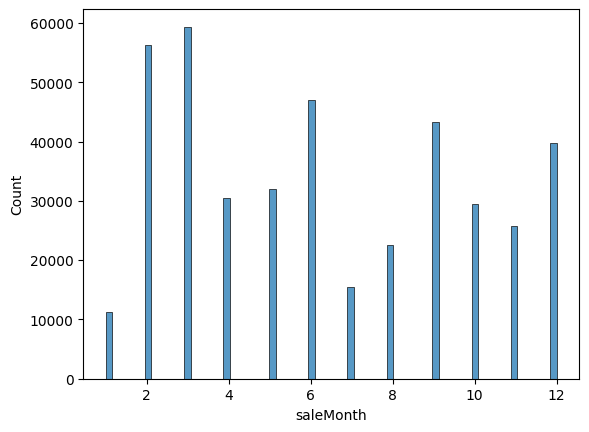

In [20]:
# checking which month has more buyers 
sns.histplot(df_tmp["saleMonth"])

<AxesSubplot:xlabel='saleDay', ylabel='Count'>

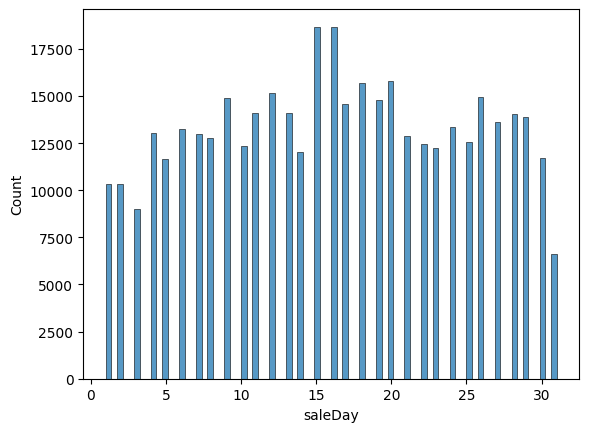

In [21]:
# checking which specific days have more buyers
sns.histplot(df_tmp["saleDay"])

<AxesSubplot:xlabel='saleDayOfWeek', ylabel='Count'>

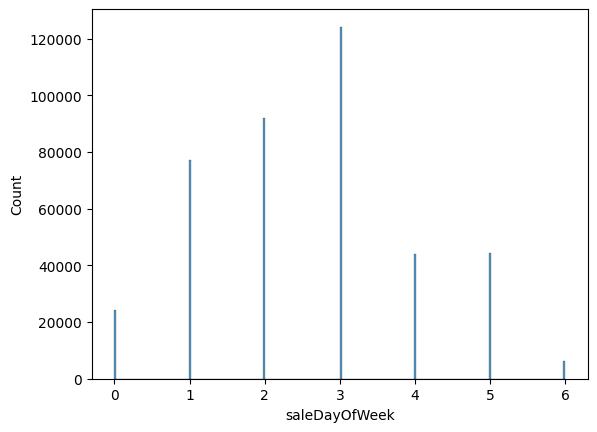

In [22]:
sns.histplot(df_tmp["saleDayOfWeek"])


### Converting String into Categories

In [23]:
# Here we will use the `Pandas Type Api `
# Find the Columns which contains strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [24]:
# Converting all String values into Category values 
for label , content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [25]:
# converted into category
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 61 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [26]:
# Checking state column 
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [27]:
# Checking state codes assign by the categorical conversion 
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

### Filling Missing Values

In [28]:
# Checking all missing values
df_tmp.isna().sum()


SalesID             0
SalePrice           0
MachineID           0
ModelID             0
datasource          0
                   ..
saleDayOfYear       0
saleOnMonthStart    0
saleOnMonthEnd      0
saleOnYearStart     0
saleOnYearEnd       0
Length: 61, dtype: int64

In [29]:
# Checking numeric valued columns
for label , content in df_tmp.items() :
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear
saleOnMonthStart
saleOnMonthEnd
saleOnYearStart
saleOnYearEnd


In [30]:
# Now we will find the missing numeric valued columns
for label , content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [31]:
# Fill numeric rows with median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary columns which tells us if the data was missing or not
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())


In [32]:
# check if there is any null numeric value remaining 
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

### Filling and turning categorical varaibles into numbers

In [33]:
# Check for columns which aren't numeric 
# So values which are not numeric can be categorical 
for label , content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        pd.api.types.is_categorical_dtype(content)
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [34]:
# Turn categorical variables into numbers and fill missing
for label , content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add Binary column to indicate wehether sample had missing value
        df_tmp[label+ "is_missing"] = pd.isnull(content)
        # turn categories into numbers and add +1 so there should not be any 0 value
        df_tmp[label] = pd.Categorical(content).codes+1

In [35]:
# Check still is there any missing values 
df_tmp.isna().sum()

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
                              ..
Backhoe_Mountingis_missing     0
Blade_Typeis_missing           0
Travel_Controlsis_missing      0
Differential_Typeis_missing    0
Steering_Controlsis_missing    0
Length: 107, dtype: int64

### Modelling

In [36]:
from sklearn.model_selection import train_test_split
# Split data into X and Y
x = df_tmp.drop("SalePrice" , axis = 1)
y = df_tmp["SalePrice"]

# Split data into train and test set 
np.random.seed(42)


# Split into train & test set
x_train , x_test , y_train , y_test = train_test_split (x , y , test_size = 0.2)

# Creating Validation Test Sets
x_valid , y_valid =  df_tmp.drop("SalePrice" , axis = 1) , df_tmp.SalePrice


In [37]:
# Let's build a Machine Learning Model
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
# instantiate model
model = RandomForestRegressor(n_jobs= -1)

# fit the model
model.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [38]:
# Score the model 
model.score(x_train , y_train)

0.9868736761453887

### Building Evaluation Function 

In [39]:
# Create evaluation function using (RMSLE)
from sklearn.metrics import mean_squared_log_error , mean_absolute_error , r2_score

def rmsle(y_test , y_preds):
    """
    Calculate root mean squared error between predictions and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test , y_preds))

# Create function to evaluate model on different levels 
def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    scores = {
        "Training MAE" : mean_absolute_error(y_train , train_preds),
        "Valid MAE": mean_absolute_error(y_valid, val_preds),
        "Training RMSLE": rmsle(y_train, train_preds),
        "Valid RMSLE": rmsle(y_valid, val_preds),
        "Training R^2": r2_score(y_train, train_preds),
        "Valid R^2": r2_score(y_valid, val_preds)
    }

    return scores

In [40]:
show_scores(model)

{'Training MAE': 1634.668143870511,
 'Valid MAE': 2185.6440864409324,
 'Training RMSLE': 0.08624547372701173,
 'Valid RMSLE': 0.12233805680606505,
 'Training R^2': 0.9868736761453887,
 'Valid R^2': 0.9708998198323183}

### Testing our model on a subset (to tune the hyperparameters)

#### Hyperparameter tuning with `RandomizedSearch CV`

In [41]:
from sklearn.model_selection import RandomizedSearchCV

# Differet RandomForestRegressor Hyperparameter
rf_grid = {
    "n_estimators" : np.arange(10 , 100 , 10),
    "max_depth" : [None , 3, 5 , 10],
    "min_samples_split" : np.arange(2 , 20 , 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features" : [0.5 , 1 , "sqrt" , "auto"],
    "max_samples" : [None],
}

# Instantiate Randomized Search CV model
np.random.seed(42)
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1), 
                             param_distributions= rf_grid , 
                             n_iter = 2 , 
                             cv = 5 ,                            
                             verbose= True,
                            )

# fit the Randomized Search Cv model 
rs_model.fit(x_train , y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [None],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [42]:
# Finding the best model hyperparameters
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_samples': None,
 'max_features': 1,
 'max_depth': None}

In [43]:
# Evaluating the Randomized Search Model 
show_scores(rs_model)

{'Training MAE': 5239.723907479816,
 'Valid MAE': 5522.2484763539605,
 'Training RMSLE': 0.24432596340860382,
 'Valid RMSLE': 0.2568622802609485,
 'Training R^2': 0.8818882438769836,
 'Valid R^2': 0.8673322475476023}

### Training a model with the best hyperparameters

In [44]:
%%time 

# Dealing with the ideal hyperparameters
from random import random


ideal_model = RandomForestRegressor(
    n_estimators=  60 , 
    min_samples_leaf= 1 , 
    min_samples_split= 12 , 
    max_features= 1 , 
    max_depth= None , 
    random_state= 42 , 
    max_samples= None,
    )

ideal_model.fit(x_train , y_train)

CPU times: total: 44.2 s
Wall time: 44.6 s


RandomForestRegressor(max_features=1, min_samples_split=12, n_estimators=60,
                      random_state=42)

In [45]:
# Checking scores for ideal model
show_scores(ideal_model)

{'Training MAE': 5222.059573596203,
 'Valid MAE': 5505.309261394149,
 'Training RMSLE': 0.24359846105892544,
 'Valid RMSLE': 0.2561851859474575,
 'Training R^2': 0.882307737953512,
 'Valid R^2': 0.8677810357628906}

### Finally Making Predictions on Test data

In [47]:
# Import the test data
df_test = pd.read_csv("data/Test.csv",
                      low_memory=False,
                      parse_dates=["saledate"])

df_test.head()


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [49]:
# Preprocessing the data(getting the test dataset in the same format as our training dataset)

def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.day_of_week
    df["saleDayOfYear"] = df.saledate.dt.day_of_year
    df["saleOnMonthStart"] = df.saledate.dt.is_month_start
    df["saleOnMonthEnd"] = df.saledate.dt.is_month_end
    df["saleOnYearStart"] = df.saledate.dt.is_year_start
    df["saleOnYearEnd"] = df.saledate.dt.is_year_end

    df.drop("saledate", axis=1, inplace=True)

    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())

        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1

    return df


In [50]:
# Process the test data
df_test = preprocess_data(df_test)
df_test.head()


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [53]:
# We can find how the columns differ using sets
# Here we will check that which columns are missing in Trained model data vs testing data
missing_labels = set(x_train.columns) - set(df_test.columns)
missing_labels

{'Backhoe_Mountingis_missing',
 'Blade_Extensionis_missing',
 'Blade_Typeis_missing',
 'Blade_Widthis_missing',
 'Coupler_Systemis_missing',
 'Coupleris_missing',
 'Differential_Typeis_missing',
 'Drive_Systemis_missing',
 'Enclosure_Typeis_missing',
 'Enclosureis_missing',
 'Engine_Horsepoweris_missing',
 'Forksis_missing',
 'Grouser_Tracksis_missing',
 'Grouser_Typeis_missing',
 'Hydraulics_Flowis_missing',
 'Hydraulicsis_missing',
 'Pad_Typeis_missing',
 'Pattern_Changeris_missing',
 'ProductGroupDescis_missing',
 'ProductGroupis_missing',
 'ProductSizeis_missing',
 'Pushblockis_missing',
 'Ride_Controlis_missing',
 'Ripperis_missing',
 'Scarifieris_missing',
 'Steering_Controlsis_missing',
 'Stick_Lengthis_missing',
 'Stickis_missing',
 'Thumbis_missing',
 'Tip_Controlis_missing',
 'Tire_Sizeis_missing',
 'Track_Typeis_missing',
 'Transmissionis_missing',
 'Travel_Controlsis_missing',
 'Turbochargedis_missing',
 'Undercarriage_Pad_Widthis_missing',
 'UsageBandis_missing',
 'auction

In [55]:
# Manually adjust df_test to have auctioneerID_is_missing column
df_test['Backhoe_Mountingis_missing',
        'Blade_Extensionis_missing',
        'Blade_Typeis_missing',
        'Blade_Widthis_missing',
        'Coupler_Systemis_missing',
        'Coupleris_missing',
        'Differential_Typeis_missing',
        'Drive_Systemis_missing',
        'Enclosure_Typeis_missing',
        'Enclosureis_missing',
        'Engine_Horsepoweris_missing',
        'Forksis_missing',
        'Grouser_Tracksis_missing',
        'Grouser_Typeis_missing',
        'Hydraulics_Flowis_missing',
        'Hydraulicsis_missing',
        'Pad_Typeis_missing',
        'Pattern_Changeris_missing',
        'ProductGroupDescis_missing',
        'ProductGroupis_missing',
        'ProductSizeis_missing',
        'Pushblockis_missing',
        'Ride_Controlis_missing',
        'Ripperis_missing',
        'Scarifieris_missing',
        'Steering_Controlsis_missing',
        'Stick_Lengthis_missing',
        'Stickis_missing',
        'Thumbis_missing',
        'Tip_Controlis_missing',
        'Tire_Sizeis_missing',
        'Track_Typeis_missing',
        'Transmissionis_missing',
        'Travel_Controlsis_missing',
        'Turbochargedis_missing',
        'Undercarriage_Pad_Widthis_missing',
        'UsageBandis_missing',
        'auctioneerID_is_missing',
        'fiBaseModelis_missing',
        'fiModelDescis_missing',
        'fiModelDescriptoris_missing',
        'fiModelSeriesis_missing',
        'fiProductClassDescis_missing',
        'fiSecondaryDescis_missing',
        'stateis_missing'] = False
df_test.head()


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,"(Backhoe_Mountingis_missing, Blade_Extensionis_missing, Blade_Typeis_missing, Blade_Widthis_missing, Coupler_Systemis_missing, Coupleris_missing, Differential_Typeis_missing, Drive_Systemis_missing, Enclosure_Typeis_missing, Enclosureis_missing, Engine_Horsepoweris_missing, Forksis_missing, Grouser_Tracksis_missing, Grouser_Typeis_missing, Hydraulics_Flowis_missing, Hydraulicsis_missing, Pad_Typeis_missing, Pattern_Changeris_missing, ProductGroupDescis_missing, ProductGroupis_missing, ProductSizeis_missing, Pushblockis_missing, Ride_Controlis_missing, Ripperis_missing, Scarifieris_missing, Steering_Controlsis_missing, Stick_Lengthis_missing, Stickis_missing, Thumbis_missing, Tip_Controlis_missing, Tire_Sizeis_missing, Track_Typeis_missing, Transmissionis_missing, Travel_Controlsis_missing, Turbochargedis_missing, Undercarriage_Pad_Widthis_missing, UsageBandis_missing, auctioneerID_is_missing, fiBaseModelis_missing, fiModelDescis_missing, fiModelDescriptoris_missing, fiModelSeriesis_missing, fiProductClassDescis_missing, fiSecondaryDescis_missing, stateis_missing)"
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [56]:
# Make predictions on the test data 
test_preds = ideal_model.predict(df_test)
test_preds

c:\Users\Tejas Dashpute\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Tejas Dashpute\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([20471.30455079, 29199.3130536 , 40497.09912278, ...,
       30198.24737404, 34092.02869111, 35400.3048588 ])

In [57]:
# Format predictions into Dataframe
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds


,SalesID,SalesPrice
0,1227829,20471.304551
1,1227844,29199.313054
2,1227847,40497.099123
3,1227848,38942.823034
4,1227863,37876.538260
...,...,...
12452,6643171,30969.098046
12453,6643173,33072.960448
12454,6643184,30198.247374
12455,6643186,34092.028691


In [58]:
# Export prediction data
df_preds.to_csv(
    "data/test_predictions.csv", index=False)


# Feature Importance

In [59]:
# Find feature importance of our best model
ideal_model.feature_importances_


array([3.84537999e-02, 3.39204393e-02, 5.66350450e-02, 6.34862216e-03,
       9.90857452e-03, 8.12020339e-02, 8.21368957e-03, 6.01736023e-03,
       5.30246515e-02, 4.31020053e-02, 6.12438097e-02, 1.14890249e-02,
       2.94138959e-02, 4.48416503e-02, 4.21711863e-02, 1.24498550e-02,
       8.67382682e-03, 6.38163251e-03, 2.68146584e-03, 4.49377346e-02,
       2.46402835e-03, 6.35851514e-03, 9.06040996e-03, 2.06100943e-03,
       5.21855578e-03, 1.74352545e-03, 1.94715805e-03, 2.79647242e-03,
       5.08128825e-03, 3.60891070e-03, 1.02084669e-02, 4.54389092e-03,
       9.45028375e-03, 1.41951158e-03, 3.22429145e-03, 9.81934286e-03,
       5.39457932e-03, 1.09781857e-02, 1.00005530e-02, 8.57920070e-03,
       1.15253520e-02, 4.55862469e-03, 6.85112827e-03, 2.71368354e-03,
       5.12327744e-03, 2.73649132e-03, 2.47142563e-03, 8.21830660e-03,
       6.30292832e-03, 2.31336344e-03, 2.49026727e-03, 2.55914522e-02,
       9.17875453e-03, 1.13383363e-02, 8.39346519e-03, 1.40369898e-02,
      

In [60]:
# plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))

    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()


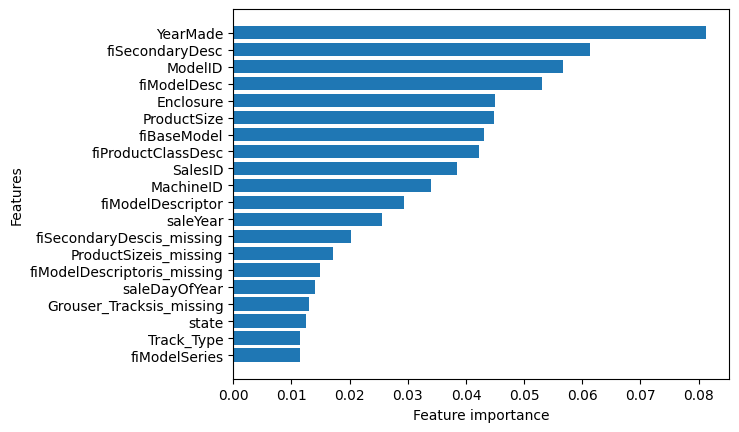

In [62]:
plot_features(x_train.columns, ideal_model.feature_importances_)
